In [13]:
import pandas as pd

In [14]:
teams=pd.read_csv("C:/Users/anush/Downloads/teams.csv")

In [15]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [16]:
teams=teams[["team","country","year","athletes","prev_medals","medals","age"]]

In [17]:
teams.corr(numeric_only="True")["medals"]

year          -0.021603
athletes       0.840817
prev_medals    0.920048
medals         1.000000
age            0.025096
Name: medals, dtype: float64

In [18]:
import seaborn as sbn

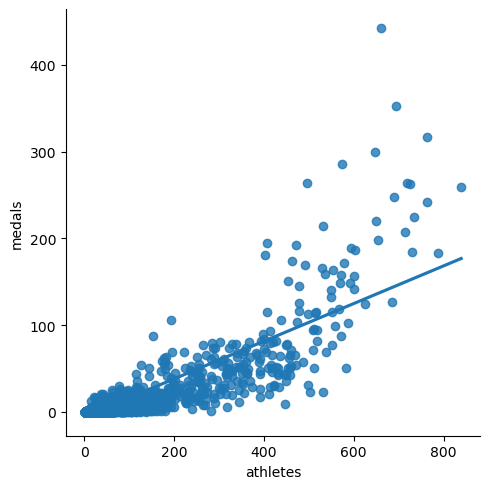

In [19]:
sbn.lmplot(x='athletes',y='medals',data=teams,fit_reg=True,ci=None)

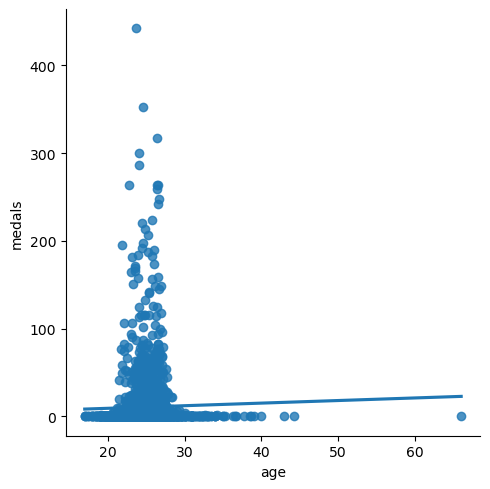

In [20]:
sbn.lmplot(x='age',y='medals',data=teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

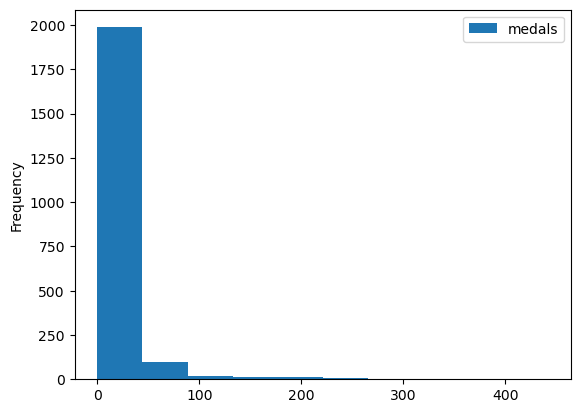

In [21]:
teams.plot.hist(y="medals")

In [23]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,prev_medals,medals,age
19,ALB,Albania,1992,9,NaN,0,25.3
26,ALG,Algeria,1964,7,NaN,0,26.0
39,AND,Andorra,1976,3,NaN,0,28.3
50,ANG,Angola,1980,17,NaN,0,17.4
59,ANT,Antigua and Barbuda,1976,17,NaN,0,23.2
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,NaN,0,20.5
2103,YAR,North Yemen,1984,3,NaN,0,27.7
2105,YEM,Yemen,1992,8,NaN,0,19.6
2112,YMD,South Yemen,1988,5,NaN,0,23.6


In [24]:
teams=teams.dropna()

In [25]:
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [27]:
train.shape

(1609, 7)

In [28]:
test.shape

(405, 7)

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [56]:
predictors = ["athletes", "prev_medals","age"]

In [57]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [58]:
predictions = reg.predict(test[predictors])

In [59]:
predictions.shape

(405,)

In [60]:
test["predictions"] = predictions

In [61]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [62]:
test["predictions"] = test["predictions"].round()

In [63]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2790123456790123

In [64]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [65]:
test[test["team"] == "USA"]

,team,country,year,athletes,prev_medals,medals,age,predictions
2053,USA,United States,2012,689,317.0,248,26.7,285.0
2054,USA,United States,2016,719,248.0,264,26.4,235.0


In [66]:
test[test["team"] == "IND"]

,team,country,year,athletes,prev_medals,medals,age,predictions
907,IND,India,2012,95,3.0,6,26.0,7.0
908,IND,India,2016,130,6.0,2,26.1,12.0


In [67]:
errors = (test["medals"] - predictions).abs()

In [68]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team 

In [69]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

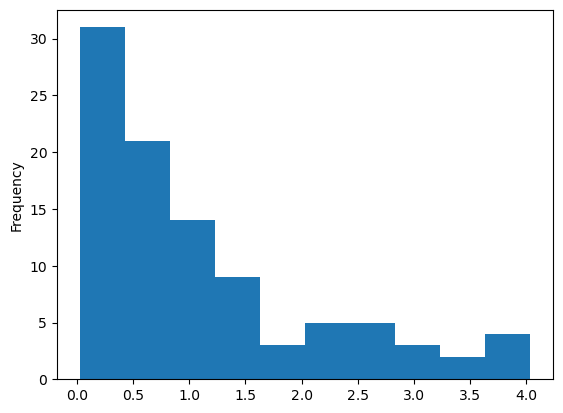

In [70]:
error_ratio.plot.hist()

In [71]:
error_ratio.sort_values()

team
FRA    0.023156
CAN    0.052738
NZL    0.074637
RUS    0.081531
CZE    0.111185
         ...   
PHI    3.606656
BDI    3.888232
JOR    3.993116
AUT    4.021925
NIG    4.036696
Name: medals, Length: 97, dtype: float64